## Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Chargement du dataset

In [11]:
df = pd.read_csv('dataset.csv')

In [12]:
def resultat(string):
    if string == 'H':
        return 1
    if string == 'D':
        return 0
    if string == 'A':
        return 2

df['FTR'] = df['FTR'].apply(resultat)

In [13]:
df_equipe = df[['HomeTeam', 'AwayTeam', 'FTR']]
df = df.drop(['HomeTeam', 'AwayTeam', 'FTR','HomeFormPtsStr','AwayFormPtsStr','MatchWeek'], axis=1)
#df = df.drop(['Home3GW','Home5GW','Home3GL','Home5GL','Away3GW','Away5GW','Away3GL','Away5GL'], axis=1)
df

,HomeScored,HomeConceded,AwayScored,AwayConceded,HomePoints,AwayPoints,HomeFormPts,AwayFormPts,Home3GW,Home5GW,Home3GL,Home5GL,Away3GW,Away5GW,Away3GL,Away5GL
0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,34.0,62.0,36.0,52.0,35,37,4,4,0,0,0,0,0,0,0,0
7338,59.0,38.0,60.0,39.0,68,63,9,10,0,0,0,0,0,0,0,0
7339,54.0,47.0,41.0,76.0,54,31,7,1,0,0,0,0,0,0,0,0
7340,85.0,36.0,35.0,64.0,83,31,9,7,0,0,0,0,0,0,0,0


## Classification

Arbre Décisionel

In [15]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)

accuracy_DT = clf_DT.score(X_test, y_test)

KNN

In [16]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_KNN = KNeighborsClassifier(n_neighbors=8)
clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)

accuracy_KNN = clf_KNN.score(X_test, y_test)

Random Forest

In [17]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

accuracy_RF = clf_RF.score(X_test, y_test)

ConvNet

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [19]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# redimensionner les données pour convenir à la forme de l'entrée de la couche Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [43]:
# Créer un modèle séquentiel
model = Sequential()

# Ajouter une couche convolutive avec 32 filtres, une fenêtre de convolution de taille 3, une fonction d'activation ReLU
# et une entrée de forme (nombre d'échantillons, longueur de la série, nombre de canaux)
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Ajouter une couche de pooling maximale
model.add(MaxPooling1D())

# Ajouter une autre couche convolutive avec 64 filtres, une fenêtre de convolution de taille 3, une fonction d'activation ReLU
model.add(Conv1D(64, 3, activation='relu'))

# Ajouter une autre couche de pooling maximale
model.add(MaxPooling1D())

# Aplatir les sorties de la couche convolutive précédente en une seule dimension
model.add(Flatten())

# Ajouter une couche dense avec 128 neurones et une fonction d'activation ReLU
model.add(Dense(128, activation='relu'))

# Ajouter une couche de sortie avec une fonction d'activation softmax pour obtenir une prédiction parmi 3 catégories
model.add(Dense(3, activation='softmax'))

# Compiler le modèle en spécifiant la fonction de perte, l'algorithme d'optimisation et la métrique à utiliser
# pour évaluer les performances du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
#model.summary()

# Former le modèle sur les données d'entraînement
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2)

# Évaluer la performance du modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50


2023-03-16 18:33:30.887372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-16 18:33:31.721696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 - 1s - loss: 1.1835 - accuracy: 0.4374 - val_loss: 1.0552 - val_accuracy: 0.4638 - 1s/epoch - 17ms/step
Epoch 2/50
74/74 - 1s - loss: 1.0524 - accuracy: 0.4557 - val_loss: 1.0403 - val_accuracy: 0.4749 - 607ms/epoch - 8ms/step
Epoch 3/50
74/74 - 1s - loss: 1.0419 - accuracy: 0.4715 - val_loss: 1.0531 - val_accuracy: 0.4485 - 580ms/epoch - 8ms/step
Epoch 4/50
74/74 - 1s - loss: 1.0377 - accuracy: 0.4738 - val_loss: 1.0576 - val_accuracy: 0.4621 - 564ms/epoch - 8ms/step
Epoch 5/50
74/74 - 1s - loss: 1.0369 - accuracy: 0.4806 - val_loss: 1.0371 - val_accuracy: 0.4834 - 573ms/epoch - 8ms/step
Epoch 6/50
74/74 - 1s - loss: 1.0366 - accuracy: 0.4766 - val_loss: 1.0426 - val_accuracy: 0.4749 - 612ms/epoch - 8ms/step
Epoch 7/50
74/74 - 1s - loss: 1.0380 - accuracy: 0.4747 - val_loss: 1.0575 - val_accuracy: 0.4494 - 603ms/epoch - 8ms/step
Epoch 8/50
74/74 - 1s - loss: 1.0378 - accuracy: 0.4696 - val_loss: 1.0367 - val_accuracy: 0.4817 - 669ms/epoch - 9ms/step
Epoch 9/50
74/74 - 1s - loss:

In [25]:
y_pred_CNN = model.predict(X_test)

46/46 [==============================] - 0s 3ms/step


2023-03-16 18:21:10.222479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Résultats

In [44]:
print("Précision du DecisionTreeClassifier:", accuracy_DT)
print("Précision du KNeighborsClassifier:", accuracy_KNN)
print("Précision du RandomForestClassifier:", accuracy_RF)
print("Précision du CNN:", test_acc)

Précision du DecisionTreeClassifier: 0.3798502382573179
Précision du KNeighborsClassifier: 0.40571817562968004
Précision du RandomForestClassifier: 0.4540503744043567
Précision du CNN: 0.44928523898124695


In [28]:
df_final = pd.DataFrame()
df_final['Résultat'] = y_test
df_final['Prédiction'] = y_pred_RF
df_final = pd.merge(df_equipe[['HomeTeam', 'AwayTeam']].reset_index(), df_final.reset_index(), on='index')
df_final = df_final.drop(['index'], axis=1)
df_final

,HomeTeam,AwayTeam,Résultat,Prédiction
0,Guingamp,St Etienne,0.0,1
1,Lille,Rennes,1.0,1
2,Lens,Toulouse,1.0,1
3,St Etienne,Bordeaux,1.0,1
4,Troyes,Auxerre,1.0,1
...,...,...,...,...
1464,Paris SG,Troyes,0.0,1
1465,Nantes,Rennes,1.0,2
1466,Montpellier,Paris SG,2.0,2
1467,St Etienne,Reims,2.0,1


## Statistiques

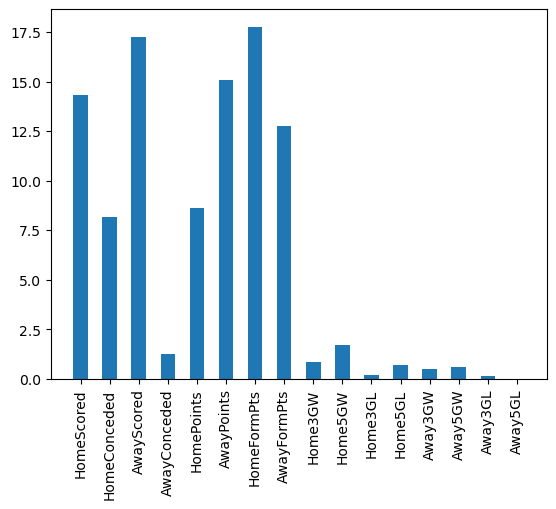

In [98]:
nb_deb = 0
nb_fin = 100

plt.bar(x=df.columns[nb_deb:nb_fin],height=clf_RF.feature_importances_[nb_deb:nb_fin]*100,width=0.5,bottom=None, align='center')
plt.xticks(range(len(df.columns[nb_deb:nb_fin])), df.columns[nb_deb:nb_fin], rotation='vertical')
plt.show()